In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x + 5

In [3]:
f(3)

20

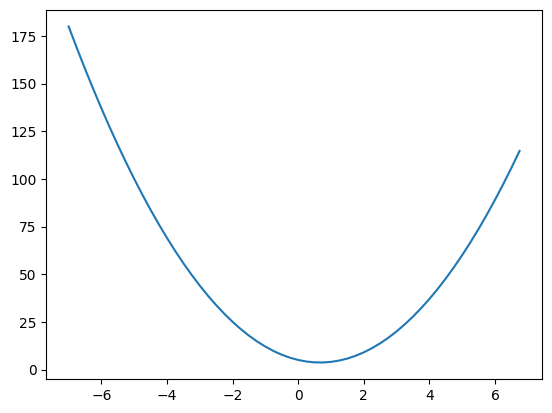

In [4]:
x = np.arange(-7,7,0.25)
y = f(x)
plt.plot(x, y)

In [5]:
h = 0.0001
x = 3
(f(x + h) - f(x)) / h

14.000300000063248

In [6]:
a = 2
b = -3 
c = 10
d = a * b + c
d 

4

In [7]:
h = 0.001
a += h

d1 = a * b + c
slope = (d1 - d) / h
d,d1,slope

(4, 3.997, -3.0000000000001137)

In [8]:
class Value:
    def __init__(self,data,_children=(),_op=(),label='',grad=0):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data,(self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data * other.data,(self,other),'*')
    
    
a = Value(2,label='a')
b = Value(-3,label='b')
c = Value(10,label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
d

Value(data=4)

In [9]:
d._prev

{Value(data=-6), Value(data=10)}

In [10]:
d._op

'+'

In [11]:
# %pip install graphviz
def trace(root):
    # builds a set of all nodes and edges in a graph 
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right 
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        label = getattr(n, 'label', '')  # Use an empty string if 'label' is not found
        # for any value in the graph, create a rectangular ('record') node for it 
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (label, n.data,n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it 
            op_uid = uid + n._op
            dot.node(name=op_uid, label=n._op)
            # and connect this node to it 
            dot.edge(op_uid, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2 
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot


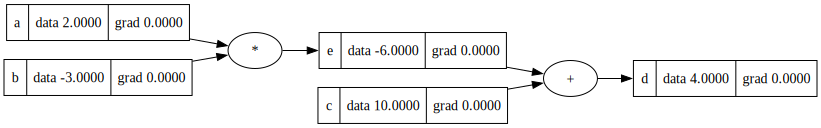

In [12]:
draw_dot(d)